In [1]:
import pandas as pd
import numpy as np

In [2]:
df_can = pd.read_excel('Canada.xlsx', sheet_name ='Canada by Citizenship', skiprows= range(20), skipfooter=2)

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_can.drop(['AREA', 'REG', 'DEV', 'Coverage'], axis = 1, inplace=True)

In [5]:
df_can = df_can.rename(columns=({'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}))
df_can.head(2)

,Type,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_can.set_index('Country', inplace=True)

In [7]:
df_can.isnull().sum()

Type             0
Continent        0
Region           0
DevName          0
1980             0
1981             0
1982             0
1983             0
1984             0
1985             0
1986             0
1987             0
1988             0
1989             0
1990             0
1991             0
1992             0
1993             0
1994             0
1995             0
1996             0
1997             0
1998             0
1999             0
2000             0
2001             0
2002             0
2003             0
2004             0
2005             0
2006             0
2007             0
2008             0
2009             0
2010             0
2011             0
2012             0
2013             0
Unnamed: 43    195
Unnamed: 44    195
Unnamed: 45    195
Unnamed: 46    195
Unnamed: 47    195
Unnamed: 48    195
Unnamed: 49    195
Unnamed: 50    195
dtype: int64

In [8]:
#we need to ensure that all columns are of string type for consistency
all(isinstance(column, str) for column in df_can.columns)

False

In [9]:
df_can.columns = list(map(str, df_can.columns))

In [10]:
df_can['Total'] = df_can.sum(axis=1)

In [11]:
df_can.head(2)

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Immigrants,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0


In [12]:
print('data dimension', df_can.shape)

data dimension (195, 47)


In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
mpl.__version__

'3.3.4'

## AREA PLOT

In [14]:
# I want to get a more cummulative plot of the top 5 countries with the most immigration to canada using an area plot

# first, I sort the table by the Total column in a descending manner to get a dataframe of the top 5 countries
df_can.sort_values(['Total'], ascending = False, axis = 0,  inplace = True)

years = list(map(str, range(1980, 2014)))
years
# then assign the dataframe(.head(5)) to object "df_top5"
df_top5 = df_can.head(5)
# i need to transpose the data because it is in dataframe
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Text(0, 0.5, 'Number of Immigrants')

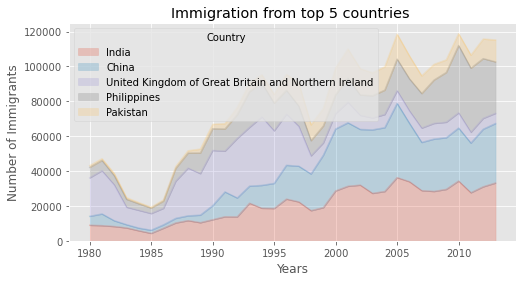

In [15]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             alpha =0.25,
            figsize = (8,4))
plt.title('Immigration from top 5 countries ')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

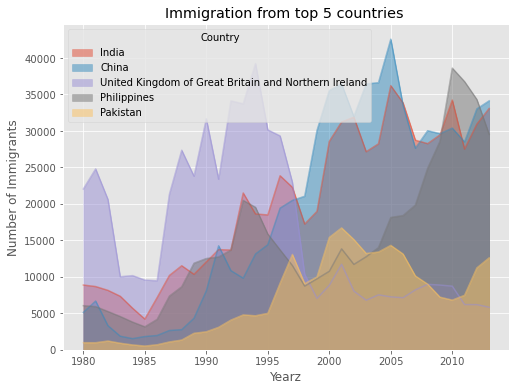

In [16]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
            stacked=False,
            figsize=(8,6))
plt.title('Immigration from top 5 countries ')
plt.xlabel('Yearz')
plt.ylabel('Number of Immigrants')
plt.show()

Text(0, 0.5, 'Number of Immigrants')

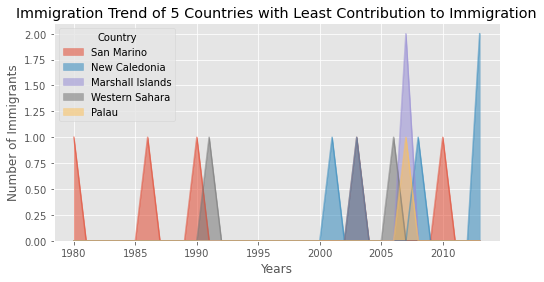

In [17]:
#using the second option which is most preferred for complex plotting (artist layer)
df_least5 = df_can.tail(5)[years].transpose() #unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.
df_least5.index =df_least5.index.map(int)
ax = df_least5.plot(kind="area",
                 alpha=0.55,
                 stacked=False,
                 figsize=(8,4))
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')


## HISTOGRAM

In [18]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [19]:
#to show the frequency distribution of new immigrants into canada in the year 2013
# first we examine the interval split interval by using the numpy HISTOGRAM method to get the frequency count and bin ranges
count, bin_edges = np.histogram(df_can['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


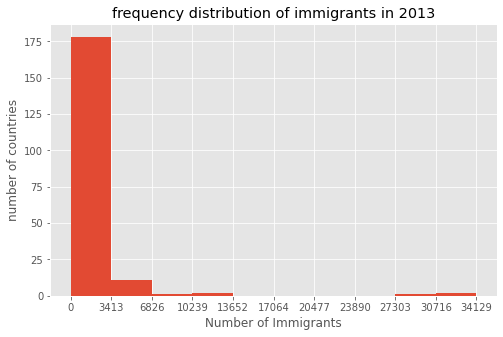

In [20]:
df_can['2013'].plot(kind='hist', figsize=(8,5), xticks=bin_edges) #or df['2013'].plot.hist()
plt.title('frequency distribution of immigrants in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('number of countries')
plt.show()

In [21]:
#immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


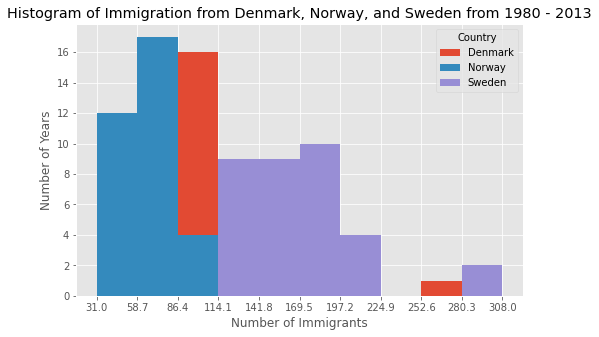

In [22]:
count, bin_edges = np.histogram(df_t)
df_t.plot(kind='hist', figsize=(8,5), xticks =bin_edges)
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

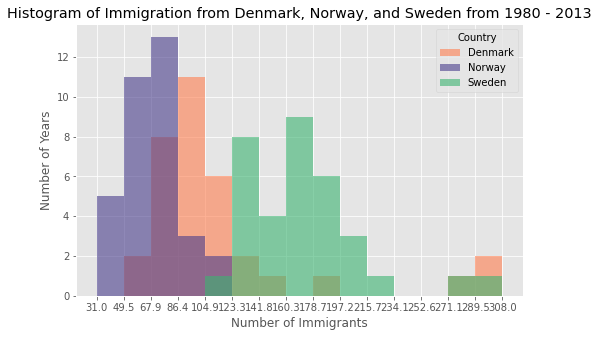

In [23]:
# to improve the impact and aesthetics of the previous plot
count, bin_edges = np.histogram(df_t, 15) # bin size is 15
df_t.plot(kind='hist',
          bins = 15,
          alpha=0.6,
          figsize =(8,5),
          xticks = bin_edges,
         color=['coral', 'darkslateblue', 'mediumseagreen']
         )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [24]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


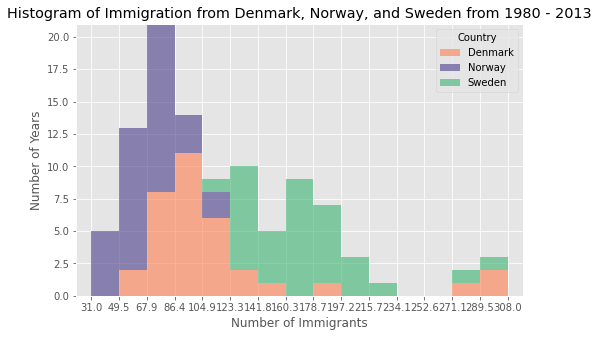

In [25]:
#to avoid overlap, and eliminate the extra gap before and after the bins edges by adjusting the min and max xlabel
count, bin_edges = np.histogram(df_t, 15) # bin size is 15
xmin = bin_edges[0] - 10  #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10 #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

df_t.plot(kind='hist',
          bins = 15,
          alpha=0.6,
          figsize =(8,5),
          xticks = bin_edges,
         color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim = (xmin, xmax)
         )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

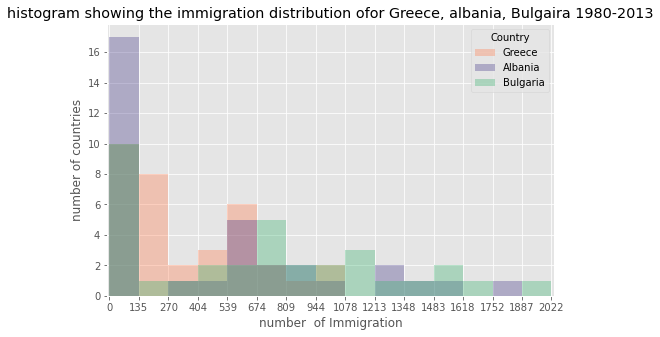

In [26]:
#Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013?
#Use an overlapping plot with 15 bins and a transparency value of 0.35.
df_canm =df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
count, bin_edges = np.histogram(df_canm, 15)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10
df_canm.plot(kind='hist', 
             bins = 15,
             alpha = 0.35,
             xticks = bin_edges,
             figsize=(8, 5),
             xlim = (xmin, xmax),
             color=['coral', 'darkslateblue', 'mediumseagreen'],
            )
plt.title('histogram showing the immigration distribution ofor Greece, albania, Bulgaira 1980-2013')
plt.xlabel('number  of Immigration')
plt.ylabel('number of countries')
plt.show

 ## Bar chart

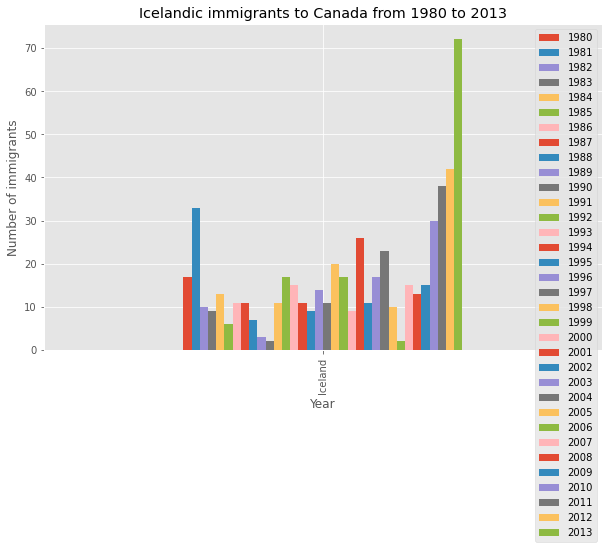

In [27]:
# One disadvantage is that they lack space for text labelling at the foot of each bar
# Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

df_ice = df_can.loc[['Iceland'], years]

df_ice.plot(kind='bar', rot =90,
           figsize = (10, 6))
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

In [28]:
df_ice.head(20)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Iceland,17,33,10,9,13,6,11,11,7,3,...,23,10,2,15,13,15,30,38,42,72


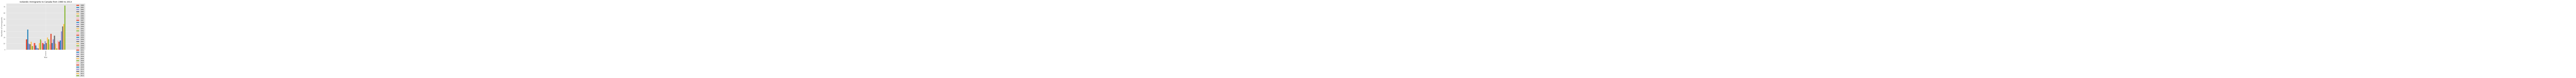

In [29]:
df_ice.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

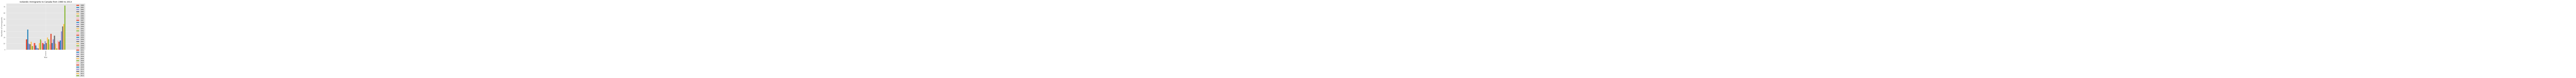

In [30]:
df_ice.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )
# annotate text - to put a text over the ARROW
plt.annotate('2008 - 2011 Financial Crisis', # text to display
            xy = (28, 30),     # start the text at at point (year 2008 , pop 30)
            rotation = 73,     # based on trial and error to match the arrow
            va='bottom',       # want the text to be vertically 'bottom' aligned
            ha= 'left'        # want the text to be horizontally 'left' algned.
            )

plt.show()

In [31]:
# a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.
df_can.sort_values(['Total'], ascending = False, inplace=True)
df_top15 = df_can.head(15)
df_top15['Total']


Country
India                                                   691904.0
China                                                   659962.0
United Kingdom of Great Britain and Northern Ireland    551500.0
Philippines                                             511391.0
Pakistan                                                241600.0
United States of America                                241122.0
Iran (Islamic Republic of)                              175923.0
Sri Lanka                                               148358.0
Republic of Korea                                       142581.0
Poland                                                  139241.0
Lebanon                                                 115359.0
France                                                  109091.0
Jamaica                                                 106431.0
Viet Nam                                                 97146.0
Romania                                                  93585.0
Name: Total, dtyp

ValueError: invalid literal for int() with base 10: 'Type'

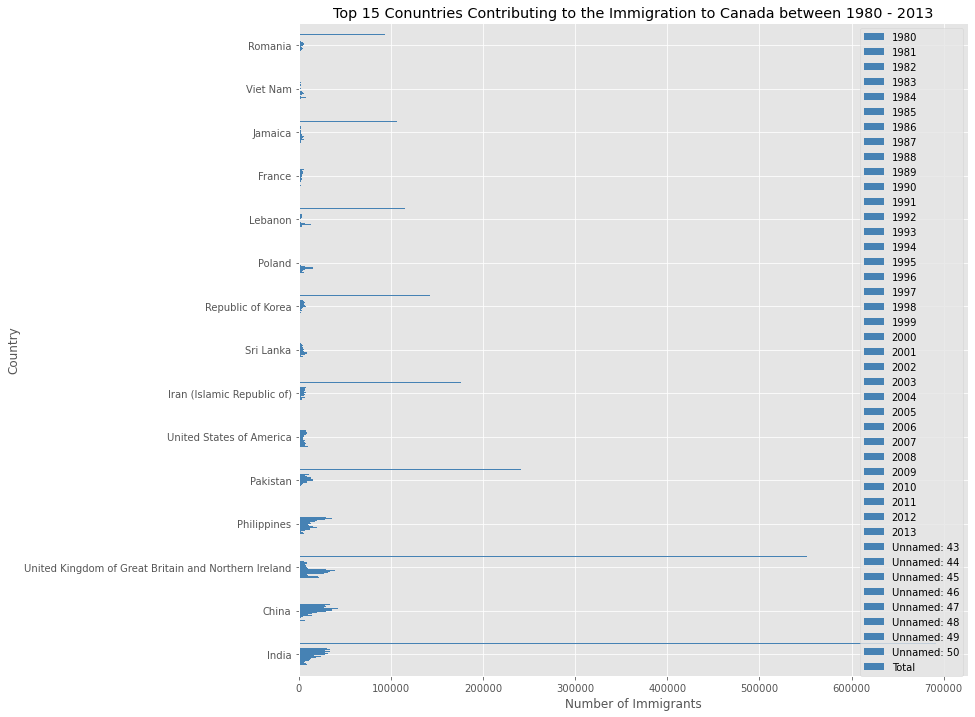

In [32]:
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(df_top15): 
        label = format(int(value), ',')
plt.annotate(label,xy=(value - 47000, index - 0.10), color='white')

plt.show()


## PIE CHART

In [ ]:
#a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.
df_continent = df_can.groupby('Continent', axis =0).sum() # groupby always come with a function, .sum() .count() .mean() .std() .aggregate() .apply()

print(type(df_can.groupby('Continent', axis = 0)))

df_continent.head()

In [ ]:
# plotting
df_continent['Total'].plot(kind='pie',
                 figsize = (8,5),
                 autopct = '%1.1f%%', # add in percentages
                 startangle = 90,     # start angle 90° (Africa)
                 shadow = True)     # add shadow   
plt.title('Immigration to Canada  by continent {1980-2013} ')
plt.axis('equal') # to set the pie chart to look like a circle
plt.show

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continent['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continent.index, loc='upper left') 

plt.show()

In [ ]:
# pie charts showing immigration group by continent in the year 2013
color_list = ['red', 'darkslateblue', 'coral', 'lightgreen', 'yellowgreen', 'darkblue']
explode_list= [0.1, 0, 0, 0,0.1,0.2]
df_continent['2013'].plot(kind = 'pie',
                         figsize = (15, 8),
                         autopct = '%1.1f%%',
                          labels = None,
                          shadow = True,
                          pctdistance=1.11,
                          startangle = 90,
                          colors = color_list,
                          explode = explode_list
                         )
plt.title('Immigration to canada by continent in 2013')
plt.axis ( 'equal' )
plt.legend(labels = df_continent.index, loc = 'upper left')
plt.show

## BOX PLOT

In [ ]:
 # box plot for the Japanese immigrants between 1980 - 2013.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head(2)

In [ ]:
df_japan.plot(kind = 'box', figsize= (8,5))
plt.title('Immigration from Japan , [1980-2013]')
plt.ylabel('number of immigrants')
plt.show()
#to view the actual numbers
df_japan.describe()

In [ ]:
#to compare multiple datasets

In [ ]:
df_CI = df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

In [ ]:
df_CI.describe()

In [ ]:
df_CI.plot(kind='box', figsize =(8, 6))
plt.title("immigration to canada from china and india [1980-2013]")
plt.ylabel('number of immigrants')
plt.show()

In [ ]:
df_CI.plot(kind='box', figsize =(8, 6), color = 'blue', vert =False)
plt.title("immigration to canada from china and india [1980-2013]")
plt.xlabel('number of immigrants')
plt.show()

subplots

In [ ]:
#firdt create afigure (canvas)
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1, 2,2)

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax) # add to subplot 1
ax.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [ ]:
#a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.
df_can.sort_values(['Total'], ascending=False, axis = 0, inplace=True)
df_top15=df_can.head(15)
df_top15

In [ ]:
years_80= list(map(str, range(1980, 1990))) 
years_90 = list(map(str, range(1990, 2000))) 
years_00 = list(map(str, range(2000, 2010))) 
df_80s = df_top15.loc[:, years_80].sum(axis=1)
df_90s = df_top15.loc[:, years_90].sum(axis=1)
df_00s = df_top15.loc[:, years_00].sum(axis=1)
new_df = pd.DataFrame({'1980s':df_80s, '1990s': df_90s, '2000s': df_00s})
new_df

In [ ]:
new_df.describe()

In [ ]:
new_df.plot(kind='box', figsize=(8, 5), color = 'blue')
plt.title('distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.')
plt.ylabel('number of immigrants per decade')

In [ ]:
outlier_for_2000s = 105505.500000 + 1.5*(105505.500000-36101.500000)
outlier_for_2000s

In [ ]:
new_df = new_df.reset_index()
print(new_df['2000s']>209611.5)

## SCATTER PLOT

In [ ]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

In [ ]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [ ]:
# plot a linear line of best fit, and use it to predict the number of immigrants in 2015.
#we will use numpy polyfit to fit a line of deg(degree of equation) to get equation line of best fit
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

In [ ]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 



In [ ]:

#to get prediction for 2015
#No. Immigrants = 5567 * year - 10926195
print('No. Immigrants =',5567 * 2015 - 10926195)

When compared to the actual from Citizenship and Immigration Canada's (CIC) 2016 Annual Report,
we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number,
which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

Question: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

In [ ]:
 
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()


In [ ]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# show plot
plt.show()

## BUBBLE PLOT

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable z, also known as the weight. In maplotlib, we can pass in an array or scalar to the parameter s to plot(), that contains the weight of each point.
Let's start by analyzing the effect of Argentina's great depression.

In [34]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [35]:
# create a normalized weight
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

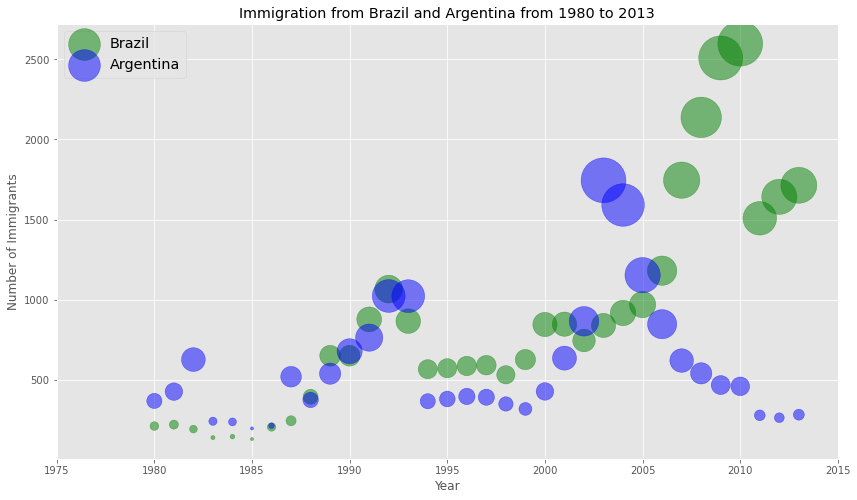

In [36]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

Question: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use df_can_t that we defined and used in the previous example.

In [39]:
norm_china = (df_can_t['China']-df_can_t['China'].min())/(df_can_t['China'].max()-df_can_t['China'].min())
norm_india = (df_can_t['India']-df_can_t['India'].min())/(df_can_t['India'].max()-df_can_t['India'].min())


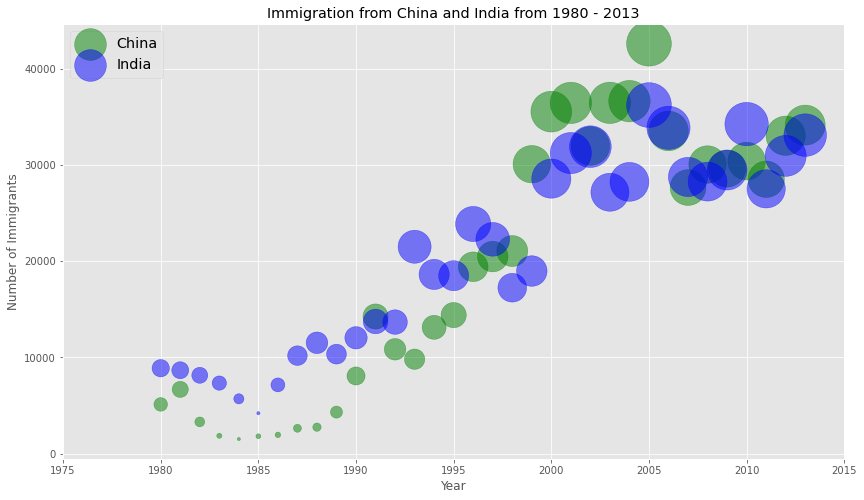

In [40]:
# China
ax0 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='China',
                        figsize=(14, 8),
                        alpha=0.5,                  # transparency
                        color='green',
                        s=norm_china * 2000 + 10,  # pass in weights 
                        xlim=(1975, 2015)
                       )

    # India
ax1 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india * 2000 + 10,
                        ax = ax0
                       )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')
